## Data Preprocessing for Game Price
#### In this file, I will pre-process the steam game data and try to do an EDA. after finishing the EDA, I will try to visualize the data about price and find the best visualization.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read steam game data
steam_df = pd.read_csv("./datasets/steam.csv")
print(steam_df.shape)

# Apply the mask to the DataFrame to keep only the rows where 'genres' does not contain ';'
# Because the multilabel genres are 
mask = ~steam_df['genres'].str.contains(';')
steam_df = steam_df[mask]

# See the remaining rows 
print(steam_df.shape)

(27075, 18)
(4043, 18)


In [3]:
# See the dataframe
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [5]:
# Here we sort the genre with the highest number of genres in descending order and output it.
ge_counts = steam_df["genres"].value_counts().sort_values(ascending=False)
top_9_ge = list(ge_counts.head(9).index)
print(top_9_ge)

['Action', 'Indie', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'RPG', 'Racing', 'Sports']


In [6]:
# We keep the top 9 genre with the highest genres count
steam_df = steam_df[steam_df['genres'].isin(top_9_ge)]
steam_df = steam_df.reset_index(drop=True)
print(steam_df.shape)

(3929, 18)


In [7]:
#save steam_df.csv
#steam_df.to_csv("cleaned_steam.csv") 

## EDA for Game Price

In [8]:
# Look the describe of data
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,3.929000e+03,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,5.000742e+05,0.971494,0.776788,26.749555,1339.944006,247.637058,155.078391,140.375668,8.231458
std,3.033166e+05,0.166434,3.516301,229.984692,9777.198024,1779.011474,946.088615,851.058031,10.967477
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.921600e+05,1.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,2.890000
50%,4.973600e+05,1.000000,0.000000,0.000000,31.000000,12.000000,0.000000,0.000000,5.190000
75%,7.439000e+05,1.000000,0.000000,19.000000,204.000000,64.000000,3.000000,3.000000,9.990000
max,1.065160e+06,1.000000,18.000000,5000.000000,251789.000000,59620.000000,44169.000000,44169.000000,421.990000


<AxesSubplot: >

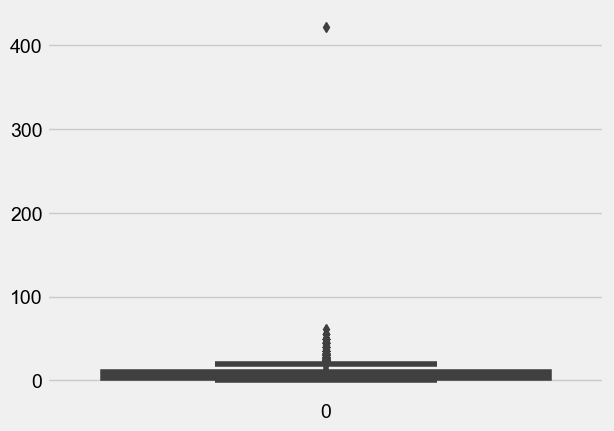

In [9]:
##viewing the outliers of price
sns.boxplot(steam_df['price'])

In [10]:
# Using histogram to see the whole data's distribution
colors = ["#F4705E"]
fig = px.histogram(steam_df, x="price",color_discrete_sequence=colors, histnorm="probability density")
fig.update_xaxes(title_text="Price($)")
fig.update_yaxes(title_text="Density")
fig.update_layout(plot_bgcolor="#FFFFFF")
fig.update_layout(width=800,height=500)
fig.show()
# As you can see, when there is an outlier, the entire distribution of data is not clearly visible.
# And the data is completely skewed on the left side

In [13]:
# Create interactive heat maps
fig = px.density_heatmap(steam_df, x='genres', y='price', nbinsx=20, nbinsy=20)

# Set the chart style
fig.update_layout(
    title='Price heatmap by genre',
    xaxis_title='Genre',
    yaxis_title='Price($)',
    plot_bgcolor='#FFFFFF',
    width=800,
    height=600
)

fig.show()

In [11]:
# We used Multiple Violin Plots to visualize the price distribution for each category.
fig = go.Figure()

genres = ["Action","Adventure","Casual","Indie","RPG","Racing","Simulation","Sports","Strategy"]

for genre in genres:
    fig.add_trace(go.Violin(x=steam_df['genres'][steam_df['genres'] == genre],
                            y=steam_df['price'][steam_df['genres'] == genre],
                            name=genre,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

In [14]:
# Remove the outlier from the price data using the IQR method.
col_outlier = ['price'] 

for col in col_outlier:
    Q1 = steam_df[col].quantile(0.25)
    Q3 = steam_df[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7
    
    steam_df = steam_df[(steam_df[col] >= limit_low) & (steam_df[col] <= limit_high)]

print(steam_df.shape)

(3604, 18)


In [15]:
# The distribution of price excluding outlier is plotted using a histogram.
colors = ["#EA5355","#0FDDE5", "#636EFB", "#DA627D", "#00C691","#CDB4DB","#8F52D2","#62B6CB","#FB9E58"]

fig = px.histogram(steam_df, x="price", color="genres",
                   color_discrete_sequence=colors,
                   category_orders={"genres":["Action","Adventure","Casual","Indie","RPG","Racing","Simulation","Sports","Strategy"]})
fig.update_xaxes(title_text="Price($)")
fig.update_yaxes(title_text="Count")
fig.update_layout(plot_bgcolor="#FFFFFF")
fig.update_layout(width=500,height=500)
fig.show()

In [16]:
# The distribution of the price excluding the outlier is drawn using the violin plot.
fig = go.Figure()

genres = ["Action","Adventure","Casual","Indie","RPG","Racing","Simulation","Sports","Strategy"]
colors = ["#EA5355","#0FDDE5", "#636EFB", "#DA627D", "#00C691","#CDB4DB","#8F52D2","#62B6CB","#FB9E58"]
colors_rgb = ["rgba(234,83,85,0.7)","rgba(15,221,229,0.5)", "rgba(99,110,251,0.7)", "rgba(218,98,125,0.7)", "rgba(0,198,145,0.7)","rgba(205,180,219,0.7)","rgba(143,82,210,0.7)","rgba(98,182,203,0.7)","rgba(251,158,88,0.7)"]
for i, genre in enumerate(genres):
    fig.add_trace(go.Violin(x=steam_df['genres'][steam_df['genres'] == genre],
                            y=steam_df['price'][steam_df['genres'] == genre],
                            name=genre,
                            box_visible=True,
                            meanline_visible=True,
                            fillcolor=colors_rgb[i],
                            line_color=colors[i],
                            showlegend=True,
                            legendgroup='genres'))
fig.update_yaxes(title_text="Price($)")
fig.update_xaxes(title_text="Genres")
fig.update_layout(
    width=900,
    height=500,
    yaxis_range=[0, None],
    legend=dict(
        title='Genres',
        title_font=dict(size=15),
        font=dict(size=13)
    )
)
fig.show()

In [32]:
# add trend line in the violin plot
fig = go.Figure()

genres = ["Action","Adventure","Casual","Indie","RPG","Racing","Simulation","Sports","Strategy"]
colors = ["#EA5355","#0FDDE5", "#636EFB", "#DA627D", "#00C691","#CDB4DB","#8F52D2","#62B6CB","#FB9E58"]
colors_rgb = ["rgba(234,83,85,0.5)","rgba(15,221,229,0.5)", "rgba(99,110,251,0.5)", "rgba(218,98,125,0.5)", "rgba(0,198,145,0.5)","rgba(205,180,219,0.5)","rgba(143,82,210,0.5)","rgba(98,182,203,0.5)","rgba(251,158,88,0.5)"]
for i, genre in enumerate(genres):
    fig.add_trace(go.Violin(x=steam_df['genres'][steam_df['genres'] == genre],
                            y=steam_df['price'][steam_df['genres'] == genre],
                            name=genre,
                            box_visible=True,
                            meanline_visible=True,
                            fillcolor=colors_rgb[i],
                            line_color=colors[i],
                            showlegend=True,
                            legendgroup='genres'))
# Add a scatter trace for the average price
avg_price = steam_df["price"].mean()
fig.add_trace(go.Scatter(x=genres, y=[avg_price]*len(genres),
                         name="Average Price",
                         mode="lines",
                         line=dict(color="brown", dash="dash"),
                         showlegend=True))    

# Adjustments to specific visual presentations
fig.update_yaxes(title_text="Price($)")
fig.update_xaxes(title_text="Genres")
fig.update_layout(
    width=900,
    height=400,
    margin=dict(l=30, r=30, t=30, b=50),
    yaxis_range=[0, None],
    legend=dict(
        title='Game Genres',
        title_font=dict(size=15),
        font=dict(size=13)
    )
)
fig.show()

In [33]:
# Save the visualization done as html for subsequent addition to the web page
fig.write_html("price_violin.html")